In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn import utils

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X = np.linspace(0,20, num = 50).reshape(50,1)
X0 = np.ones((len(X),1))
X = np.hstack((X0,X))
#data
print(X.shape)
print(X.shape[0])
print(X.shape[1])

(50, 2)
50
2


In [3]:
y = -2 * X[:,1] + 1
y = y.reshape(50,1)
y.shape

(50, 1)

## Vectorized Batch gradient descent

In [4]:
def vector_BGD(X,y,learning_rate = 0.001, epochs = 100):
    costs ,thetas = [] , []
    m = X.shape[0]
    #1.assum thetas = 0
    theta = np.zeros((X.shape[1],1))  #shape(2,1)
    for i in range(epochs):
        #2.calculate hypothesis
        y_hat = np.dot(X,theta) #shape(50,1)  (50,2).(2.1)
        #3.calculate error
        error = y_hat - y          #shape(50,1)
        #4.calculate cost function
        cost = (1/(2*m))*np.dot(error.T,error) #shape(1,1) as (1,50).(50,1)
        costs.append(cost.item())
        #5.calculate gradients
        gradient = np.dot(X.T,error)/y.shape[0] #shape(1,1) as (1,50).(50,1)
        #6.update thetas
        theta = theta - learning_rate * gradient  #shape(2,1)
        thetas.append(theta)  
        if(i>0 and np.abs(costs[i]-costs[i-1])<0.001):
            print("stopped at iteration {}".format(i))
            break
    return costs , thetas

In [5]:
costs , thetas= vector_BGD(X,y)


stopped at iteration 40


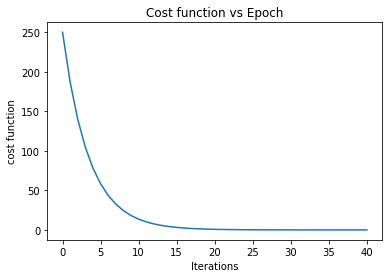

In [9]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("cost function")
plt.title("Cost function vs Epoch");

In [10]:
thetas = np.array(thetas)

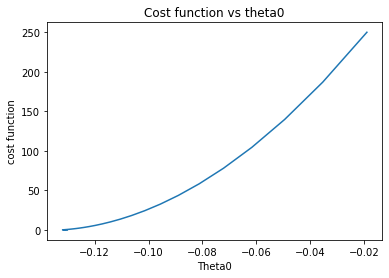

In [11]:
plt.plot(thetas[:,0],costs)
plt.xlabel("Theta0");
plt.ylabel("cost function");
plt.title("Cost function vs theta0");

## Vectorized Mini-batch gradient descent

In [12]:
def vector_MBGD(X,y,learning_rate = 0.0001, epoch = 100, batch_size = 5):
    costs , thetas = [],[]
    #1.assume thetas 
    theta = np.zeros((X.shape[1],1))    #(2,1)
    #batches
    _x = [X[i:i+batch_size] for i in range(0,len(X), batch_size)]
    _y = [y[i:i+batch_size] for i in range(0,len(y), batch_size)]
    #print(_x)
    for i in range(epoch):
        for j in range(len(_x)):
            #2.calculate hypothesis
            y_hat = np.dot(_x[j], theta)    #shape(5,1)  (5,2).(2,1)
            #3.calculate error
            error = y_hat - _y[j]           #shape(5,1)
            #4.calculate cost function
            cost = (1/(2*batch_size))*np.dot(error.T,error)  #shape(1,1)  (1,5).(5,1)
            costs.append(cost.item())
            #5.calculate gradients
            gradient = np.dot(_x[j].T,error)/batch_size  #shape(1,1)  (1,5).(5,1)
            #6.update thetas
            theta = theta - learning_rate*gradient   #shape(2,1)
            #print(theta.shape)
            thetas.append(theta)
        #stop condition
        if(i>0 and np.abs(costs[i* len(X)//batch_size-1]-costs[-1])<0.001):
            print("stopped at iteration {}".format(i))
            break
    return costs , thetas

In [13]:
MBGD_costs ,MBGD_thetas= vector_MBGD(X,y)

stopped at iteration 58


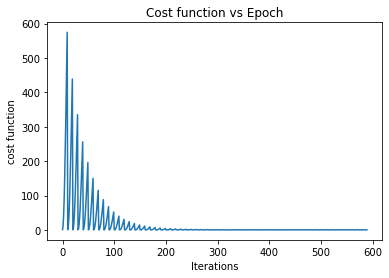

In [14]:
plt.plot(MBGD_costs)
plt.xlabel("Iterations")
plt.ylabel("cost function")
plt.title("Cost function vs Epoch");

In [15]:
MBGD_thetas = np.array(MBGD_thetas)

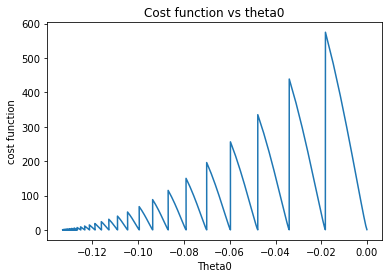

In [16]:
plt.plot(MBGD_thetas[:,0],MBGD_costs)
plt.xlabel("Theta0");
plt.ylabel("cost function");
plt.title("Cost function vs theta0");

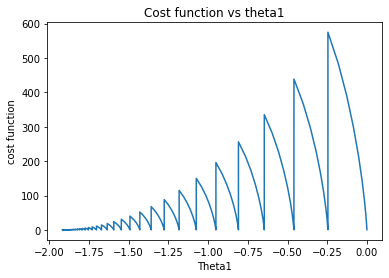

In [17]:
plt.plot(MBGD_thetas[:,1],MBGD_costs)
plt.xlabel("Theta1");
plt.ylabel("cost function");
plt.title("Cost function vs theta1");

## Vectorized Mini-batch gradient descent with adam

In [21]:
def adam_MBGD(X,y,batch_size = 5, learning_rate = 0.01,epoch = 1000, beta1 = 0.8, beta2 = 0.9, epsilon = 0.001):
    costs,thetas = [],[]
    
    #1.assume thetas , vts, mts
    theta = np.zeros((X.shape[1],1)) #shape(2,1)
    vt = np.zeros((X.shape[1],1))    #shape(2,1)
    mt = np.zeros((X.shape[1],1))
    #batches
    _x = [X[i:i+batch_size] for i in range(0,len(X),batch_size)]
    _y = [y[i:i+batch_size] for i in range(0,len(y),batch_size)]
    for i in range(epoch):
        for j in range(len(_x)):
            #calculate hypothesis
            y_hat = np.dot(_x[j],theta)
            #calculate error
            error = y_hat - _y[j]
            #calculate cost
            cost = (1/(2*batch_size))*np.dot(error.T,error)  #shape(1,1)  (1,5).(5,1)
            costs.append(cost.item())
            #calculate gradients
            gradient = np.dot(_x[j].T,error)/batch_size  #shape(1,1)  (1,5).(5,1)
            #calculate momentums (momentum cares for gradient direction)
            mt = beta1*mt + (1-beta1)* gradient
            #update v's (doesn't care for gradient direction)
            vt = beta2*vt + (1-beta2) * (gradient**2)
            #hypothesis for v's and momentum
            mt_hat = mt / (1-beta1)
            vt_hat = vt / (1-beta2)
            #update thetas
            theta = theta - mt_hat*(learning_rate/np.sqrt(vt_hat + epsilon))
            thetas.append(theta)
        #stop condition
        if(i>0 and np.abs(costs[i* len(X)//batch_size-1]-costs[-1])<0.001):
            print("stopped at iteration {}".format(i))
            break
    return costs , np.array(thetas)

In [22]:
adam_MB_costs,adam_MB_theta = adam_MBGD(X,y)

stopped at iteration 58


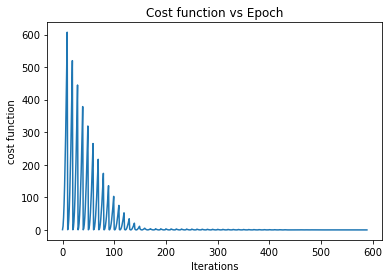

In [23]:
plt.plot(adam_MB_costs)
plt.xlabel("Iterations")
plt.ylabel("cost function")
plt.title("Cost function vs Epoch");

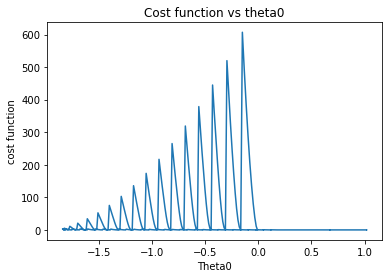

In [24]:
plt.plot(adam_MB_theta[:,0],adam_MB_costs)
plt.xlabel("Theta0");
plt.ylabel("cost function");
plt.title("Cost function vs theta0");

In [27]:
r2_score(y,np.dot(X,adam_MB_theta[-1]))

0.9999927511985454